In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

In [3]:
raw_csv_data = pd.read_csv("Data/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

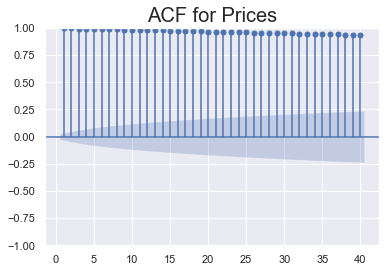

In [6]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore")

## The PACF

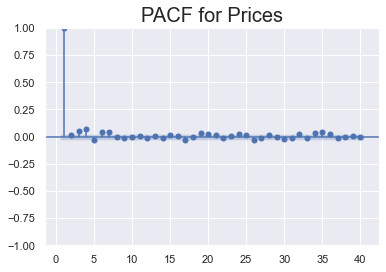

In [8]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [27]:
model_ar = ARIMA(df.market_value, order=(1,0))
results_ar=model_ar.fit()
results_ar.summary()

ValueError: `order` argument must be an iterable with three elements.

In [10]:
model_ar_2 = ARMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


## LLR Test

In [22]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### The DF-Test

In [11]:
sts.adfuller(df.market_value)

(-1.9041551418836857,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### Using Returns

In [12]:
df['returns'] = df.market_value.pct_change(1).mul(100)

In [13]:
df['returns']

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5021, dtype: float64

In [14]:
df = df.iloc[1:]

In [15]:
df['returns']

date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5020, dtype: float64

In [17]:
sts.adfuller(df.returns)

(-12.770265719497246,
 7.798058336037938e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

### ACF and PACE for retruns

Text(0.5, 1.0, 'ACF for Returns')

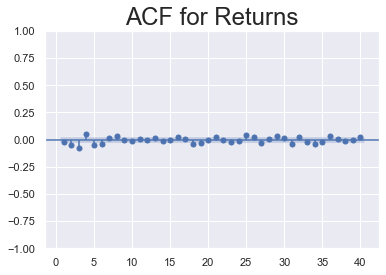

In [24]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF for Returns", size = 24)

Text(0.5, 1.0, 'ACF for Returns')

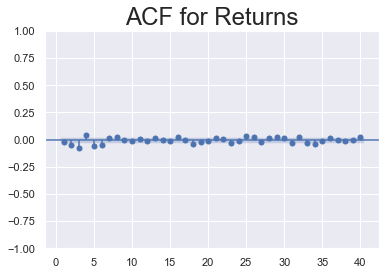

In [23]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("ACF for Returns", size = 24)

In [28]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


### Normalizing values

In [29]:
benchmark = df.market_value.iloc[0]

In [30]:
df["norm"] = df.market_value.div(benchmark).mul(100)

In [31]:
sts.adfuller(df.norm)

(-1.8928710132672357,
 0.3354222074330069,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [32]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.770265719497239,
 7.798058336038219e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

### Normalizing values

In [33]:
model_norm_ret_ar_1 = ARMA (df.norm_ret, order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


NameError: name 'results_ret_ar_6' is not defined